Read Files

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import ast

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

train_data = pd.read_csv("/Users/hoanh139/Desktop/KI/tmdb-box-office-prediction/train.csv")
train_data.head()

test_data = pd.read_csv("/Users/hoanh139/Desktop/KI/tmdb-box-office-prediction/test.csv")
test_data.head()



,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [40]:
train_data.describe(include="all")

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [41]:
test_data.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


Text(0.5, 1.0, 'Missing Value count By Features')

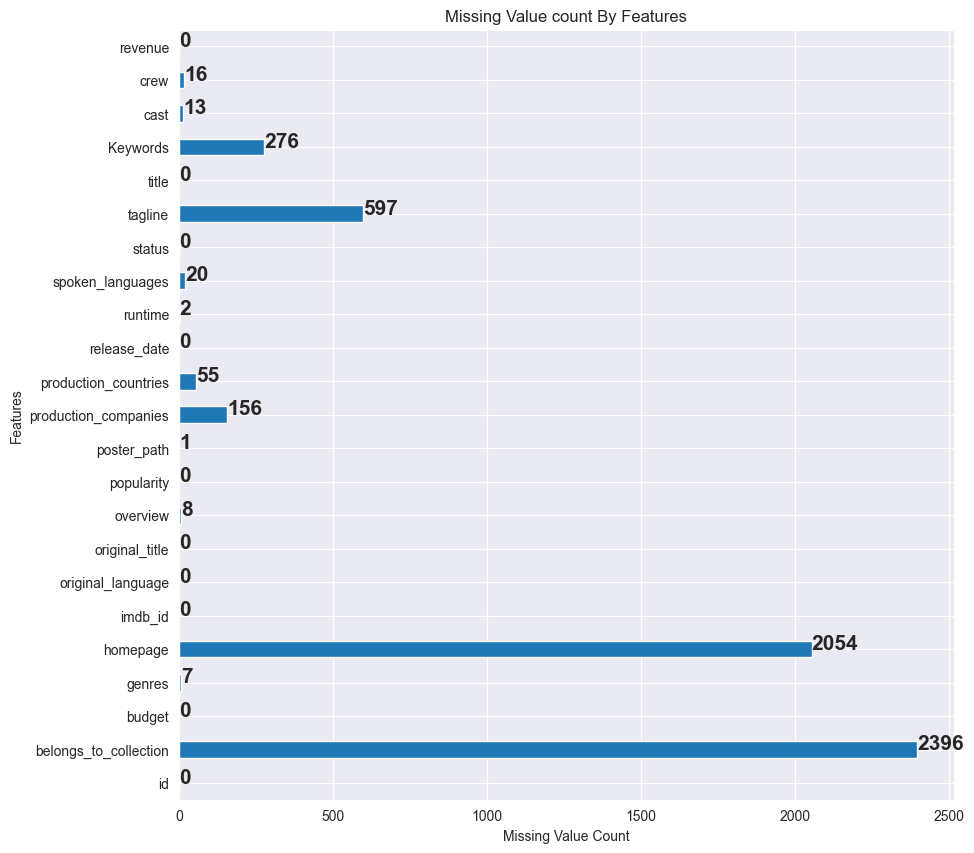

In [42]:
# get number of nan value in each column
train_data.isna().sum().plot(kind="barh", figsize=(10,10))
for count, value in enumerate(train_data.isna().sum()):
    plt.text(value, count, str(value), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

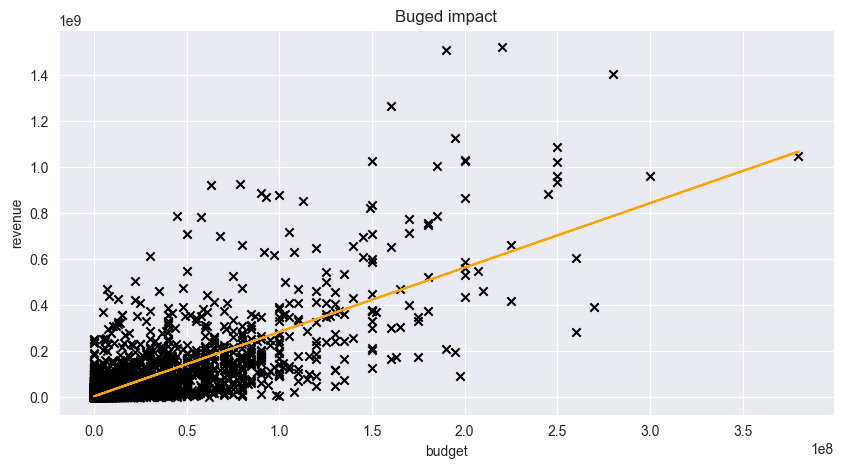

In [43]:
# We plot the scatter of the budget / revenue
plt.figure(figsize=(10,5))
plt.scatter(x = train_data['budget'], y = train_data['revenue'], marker = 'x', color = 'black')

# We fit a linear model
model = linear_model.LinearRegression()
model.fit(X = np.array(train_data['budget']).reshape(-1,1), y = train_data['revenue'])
rev_pred = model.predict(np.array(train_data['budget']).reshape(-1,1))

# We plot the fit
plt.plot(train_data['budget'], rev_pred, color = 'orange', label = 'linear')

plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Buged impact')
plt.show()

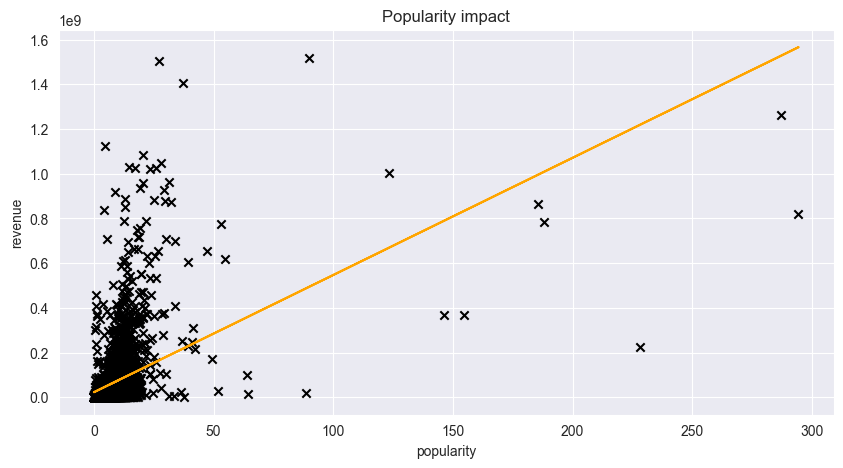

In [44]:
# We plot the scatter of the budget / revenue
plt.figure(figsize=(10,5))
plt.scatter(x = train_data['popularity'], y = train_data['revenue'], marker = 'x', color = 'black')

# We fit a linear model
model = linear_model.LinearRegression()
model.fit(X = np.array(train_data['popularity']).reshape(-1,1), y = train_data['revenue'])
rev_pred = model.predict(np.array(train_data['popularity']).reshape(-1,1))

# We plot the fit
plt.plot(train_data['popularity'], rev_pred, color = 'orange', label = 'linear')

plt.xlabel('popularity')
plt.ylabel('revenue')
plt.title('Popularity impact')
plt.show()

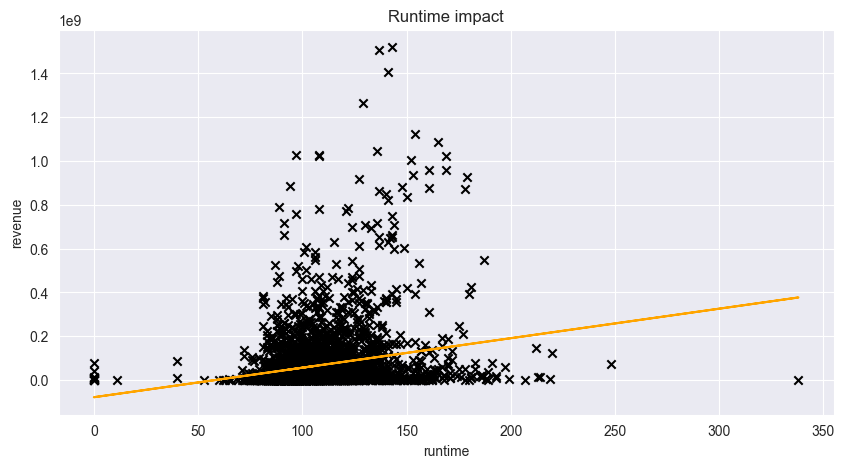

In [45]:
train_data['runtime']=train_data['runtime'].fillna(train_data['runtime'].mean()).round()
test_data['runtime']=test_data['runtime'].fillna(test_data['runtime'].mean()).round()

# We plot the scatter of the budget / revenue
plt.figure(figsize=(10,5))
plt.scatter(x = train_data['runtime'], y = train_data['revenue'], marker = 'x', color = 'black')

# We fit a linear model
model = linear_model.LinearRegression()
model.fit(X = np.array(train_data['runtime']).reshape(-1,1), y = train_data['revenue'])
rev_pred = model.predict(np.array(train_data['runtime']).reshape(-1,1))

# We plot the fit
plt.plot(train_data['runtime'], rev_pred, color = 'orange', label = 'linear')

plt.xlabel('runtime')
plt.ylabel('revenue')
plt.title('Runtime impact')
plt.show()

Text(0.5, 1.0, 'Revenue per language')

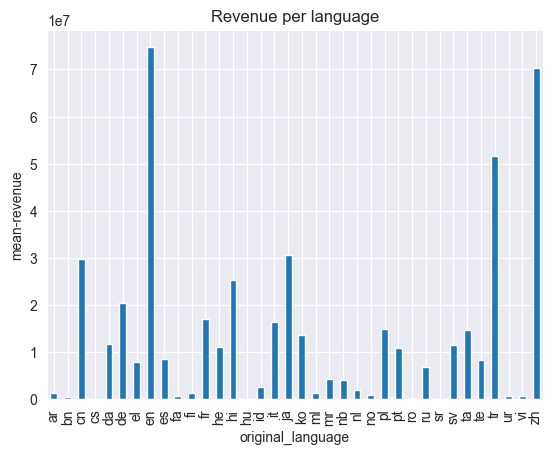

In [46]:
# analyze original_language
train_data.groupby(by = 'original_language')['revenue'].mean().plot.bar()
plt.ylabel('mean-revenue')
plt.title('Revenue per language')

Text(0, 0.5, 'mean-revenue')

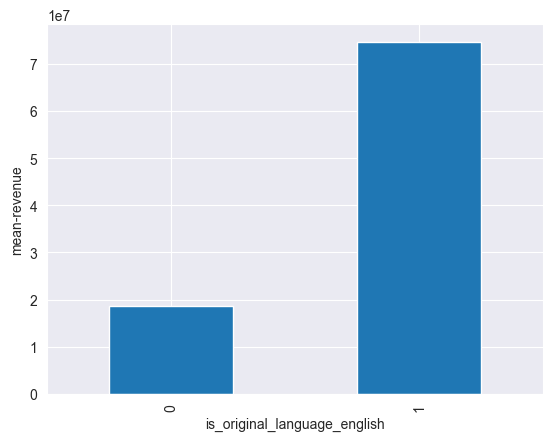

In [47]:
# add column is_original_language_english

train_data['is_original_language_english'] = np.where(train_data['original_language'] == 'en', 1, 0)
test_data['is_original_language_english'] = np.where(test_data['original_language'] == 'en', 1, 0)

train_data.groupby(by = 'is_original_language_english')['revenue'].mean().plot.bar()
plt.ylabel('mean-revenue')

In [48]:
### analyze genres
#train_data


Text(0, 0.5, 'revenue')

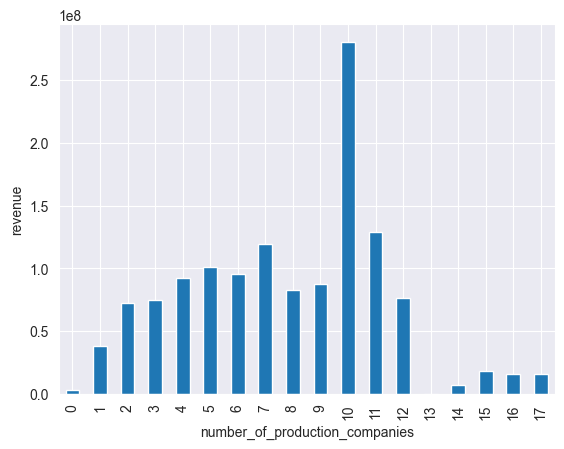

In [49]:
# analyze production_companies

#train_data
production_companies = []
for i in train_data.index:
    if str(train_data.loc[i]['production_companies']) != 'nan':
        production_companies.append(len(ast.literal_eval(train_data.loc[i]['production_companies'])))
    else:
        production_companies.append(0)

train_data['number_of_production_companies'] = production_companies
#test_data
production_companies = []
for i in test_data.index:
    if str(test_data.loc[i]['production_companies']) != 'nan':
        production_companies.append(len(ast.literal_eval(test_data.loc[i]['production_companies'])))
    else:
        production_companies.append(0)


test_data['number_of_production_companies'] = production_companies

# draw table
train_data.groupby(by = 'number_of_production_companies')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

Text(0, 0.5, 'revenue')

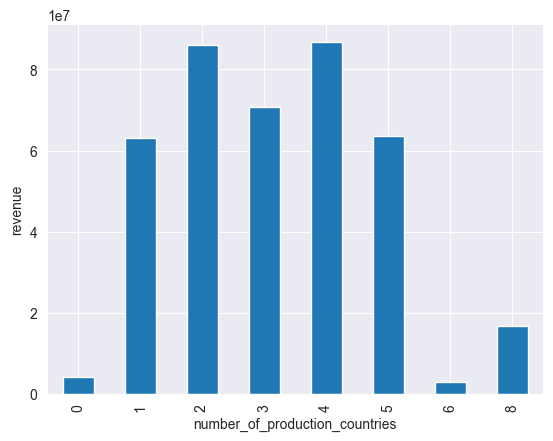

In [50]:
# analyze product_countries
#test_data
production_countries = []
for i in test_data.index:
    if str(test_data.loc[i]['production_countries']) != 'nan':
        production_country = ast.literal_eval(test_data.loc[i]['production_countries'])
        production_countries.append(len(production_country))

        isUSA = -1
        for j in range(len(production_country)):
            if production_country[j]['iso_3166_1'] == 'US':
                test_data.at[i, 'is_USA_produced'] = 1
                isUSA = 0
        if isUSA == -1:
            test_data.at[i, 'is_USA_produced'] = 0
    else:
        production_countries.append(0)
        test_data.at[i, 'is_USA_produced'] = 0

test_data['number_of_production_countries'] = production_countries

#train_data
production_countries = []
for i in train_data.index:
    if str(train_data.loc[i]['production_countries']) != 'nan':
        production_country = ast.literal_eval(train_data.loc[i]['production_countries'])
        production_countries.append(len(production_country))

        isUSA = -1
        for j in range(len(production_country)):
            if production_country[j]['iso_3166_1'] == 'US':
                train_data.at[i, 'is_USA_produced'] = 1
                isUSA = 0
        if isUSA == -1:
            train_data.at[i, 'is_USA_produced'] = 0
    else:
        production_countries.append(0)
        train_data.at[i, 'is_USA_produced'] = 0

train_data['number_of_production_countries'] = production_countries
train_data.groupby(by = 'number_of_production_countries')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

Text(0, 0.5, 'revenue')

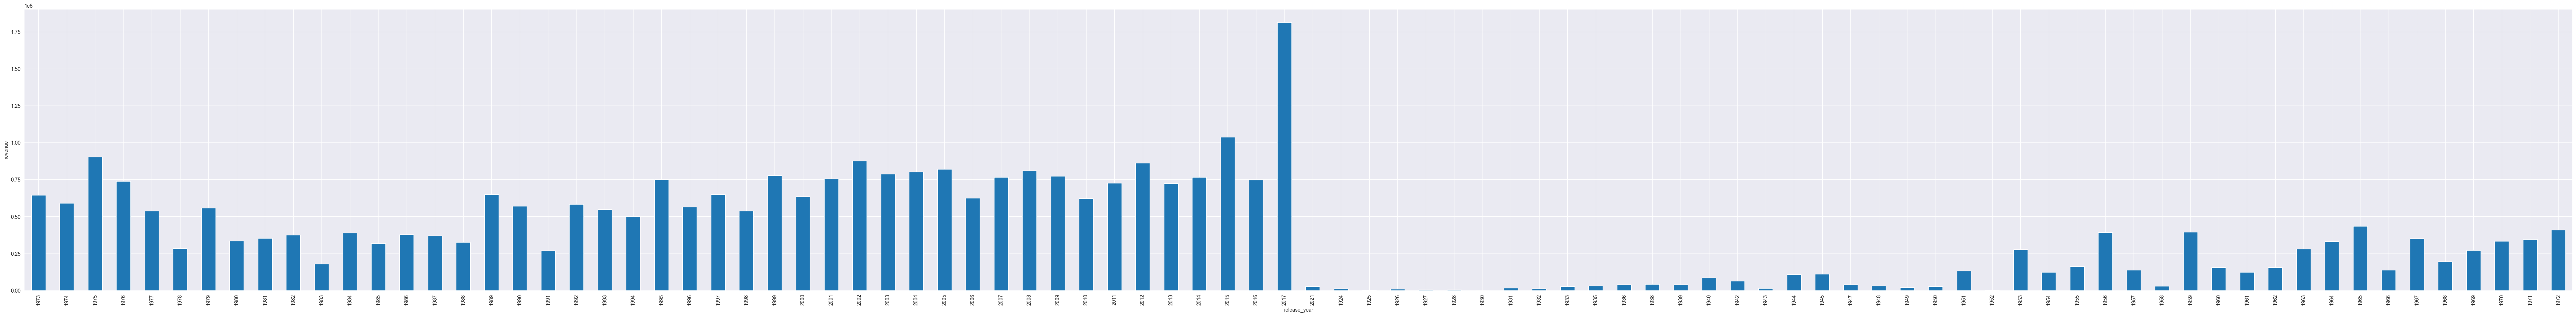

In [51]:
# analyze release_date

train_data['release_date'] = pd.to_datetime(train_data['release_date'])
train_data['release_year'] = train_data['release_date'].dt.year

for i in train_data.index:
    if train_data.loc[i]['release_year'] > 2023:
        date = train_data.loc[i]['release_year'] - 100
        train_data.at[i, 'release_year'] = str(date)

test_data['release_date'] = pd.to_datetime(test_data['release_date'])
test_data['release_year'] = test_data['release_date'].dt.year

for i in test_data.index:
    if test_data.loc[i]['release_year'] > 2023:
        date = test_data.loc[i]['release_year'] - 100
        test_data.at[i, 'release_year'] = str(date)

plt.figure(figsize = (len(pd.unique(train_data['release_year'])), 10))
train_data.groupby(by = 'release_year')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

<Axes: xlabel='status'>

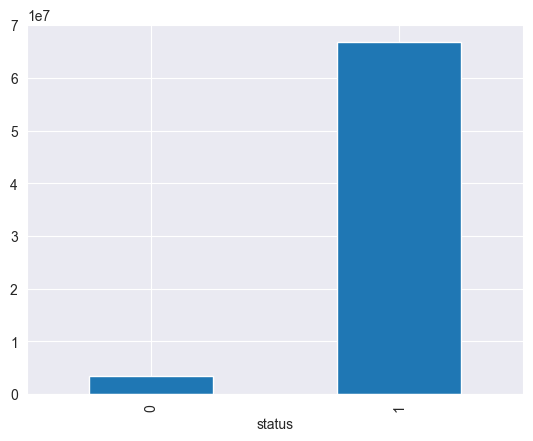

In [52]:
# analyze status

train_data['status'] = train_data['status'].map({'Released' : 1, 'Rumored' : 0})
test_data['status'] = test_data['status'].map({'Released' : 1, 'Rumored' : 0})

train_data.groupby(by = 'status')['revenue'].mean().plot.bar()


In [53]:
# Delete unused columns
train_data.drop(columns=['id', 'crew', 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'tagline', 'title', 'Keywords', 'cast','genres','runtime'], inplace=True)
test_data.drop(columns=['id', 'crew', 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'tagline', 'title', 'Keywords', 'cast', 'genres','runtime'], inplace=True)

In [54]:
# fill genre data

train_data['status'] = train_data['status'].replace(np.nan, 1, regex = True)
test_data['status'] = test_data['status'].replace(np.nan, 1, regex = True)

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
train_data['release_year'] = imp.fit_transform(train_data[['release_year']])
test_data['release_year'] = imp.fit_transform(test_data[['release_year']])

Text(0.5, 1.0, 'Missing Value count By Features')

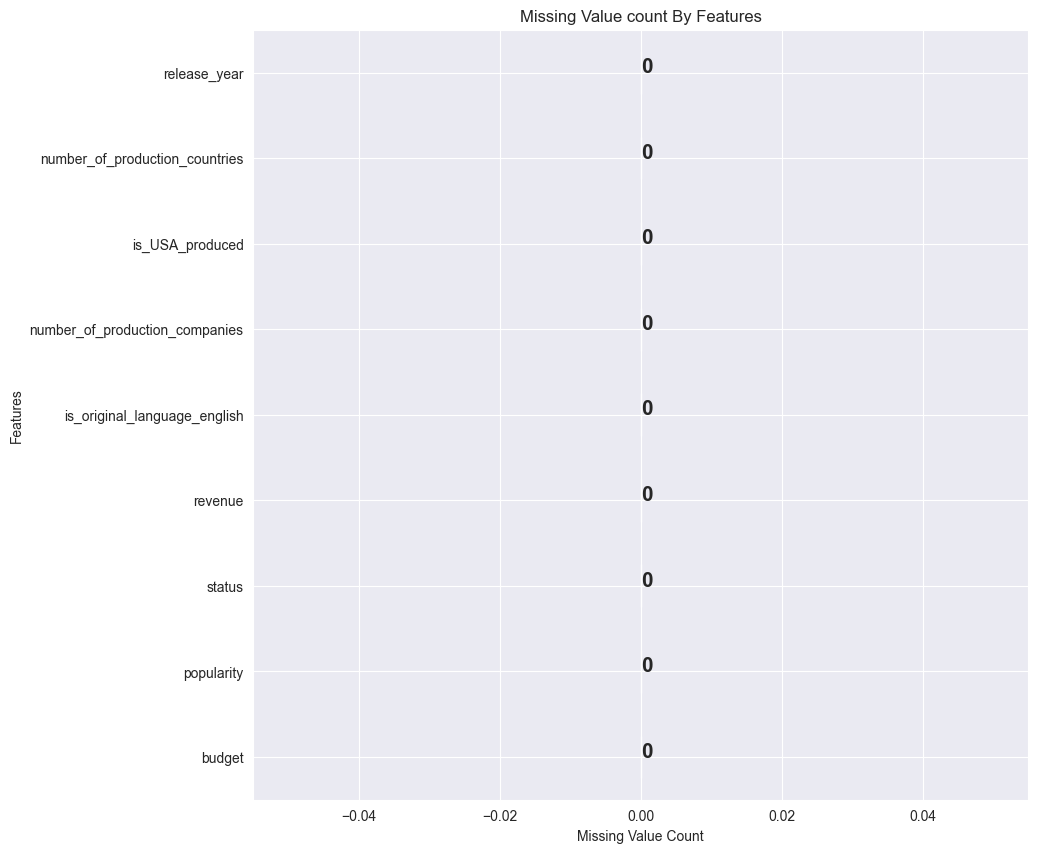

In [55]:
# get number of nan value in each column
train_data.isna().sum().plot(kind="barh", figsize=(10,10))
for count, value in enumerate(train_data.isna().sum()):
    plt.text(value, count, str(value), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

Text(0.5, 1.0, 'Missing Value count By Features')

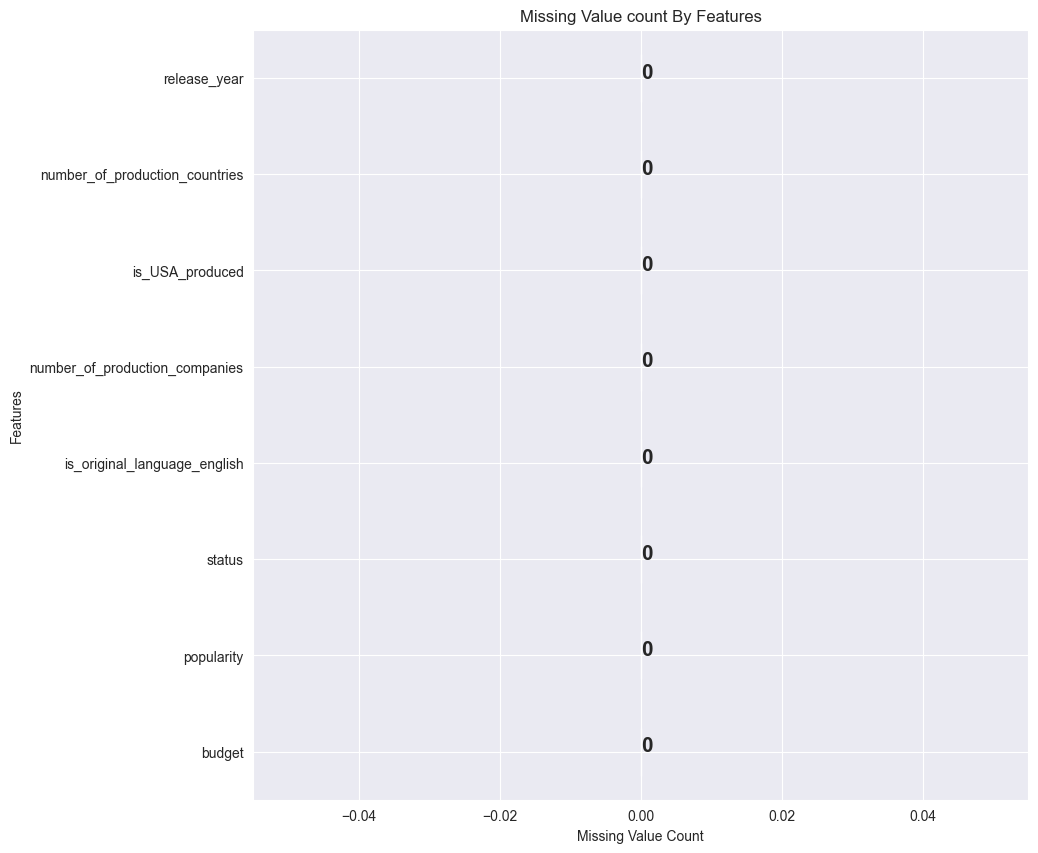

In [56]:
# get number of nan value in each column
test_data.isna().sum().plot(kind="barh", figsize=(10,10))
for count, value in enumerate(test_data.isna().sum()):
    plt.text(value, count, str(value), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

In [57]:
y = train_data['revenue']
X = train_data.drop('revenue', axis = 1)

X_test = test_data

# ML training

model = SVR()
model.fit(X, y)

scores = cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error')
print(f'RMSE: {scores.mean()}')

# predict
predictions = model.predict(X_test)
X_test.insert(0, 'id', range(3001, 3001 + len(X_test)))
output = pd.DataFrame({'id' : X_test.id, 'revenue' : predictions})
print(X_test.id, predictions)
output.to_csv('submission.csv', index = False)

RMSE: -145647193.137642
0       3001
1       3002
2       3003
3       3004
4       3005
        ... 
4393    7394
4394    7395
4395    7396
4396    7397
4397    7398
Name: id, Length: 4398, dtype: int64 [16806956.40625976 16806957.16981967 16806956.40625976 ...
 16807199.64826011 16806975.55866264 16806956.96084696]
